# <center> <font size=8> **Laboratorio 3** </font> </center>
# <center> <font size=4> *Daniel Machic (22118), María José Ramírez (221051)* </font> </center>

#### Importando los paquetes necesarios

In [30]:
import os
import shutil
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as kerasImg

In [2]:
folder = "/Users/danielmachic/Desktop/Data Science/CNN/archive/PolyMNIST/MMNIST/train/m0/"

In [3]:
base_folder = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"
train_folder = os.path.join(base_folder, "train")  # imágenes organizadas por clases 0–9
val_folder = os.path.join(base_folder, "val")      # validación organizada igual

#### División de imágenes por número

In [4]:
# Rutas base
src_base = "/Users/danielmachic/Desktop/Data Science/CNN/archive/PolyMNIST/MMNIST/train/"
dest_base = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"

# Subcarpetas nuevas separación de carpetas por número
subdirs = ['train', 'val']
labels = [str(i) for i in range(10)]  # dígitos del 0 al 9

# Crear carpetas destino (una por clase/dígito)
for subdir in subdirs:
    for label in labels:
        newdir = os.path.join(dest_base, subdir, label)
        os.makedirs(newdir, exist_ok=True)

# Fijar semilla para reproducibilidad
random.seed(1)
val_ratio = 0.25

# Recorrer carpetas m0 a m4
modalities = ['m0', 'm1', 'm2', 'm3', 'm4']
for modality in modalities:
    src_dir = os.path.join(src_base, modality)
    for img_name in os.listdir(src_dir):
        try:
            # Obtener etiqueta desde el nombre del archivo (después del punto)
            label = img_name.split(".")[1]
            if label not in labels:
                continue  # ignorar si no es una etiqueta válida

            # Decidir destino
            subset = 'val' if random.random() < val_ratio else 'train'
            dest_dir = os.path.join(dest_base, subset, label)

            # Copiar imagen
            src_path = os.path.join(src_dir, img_name)
            dest_path = os.path.join(dest_dir, f"{modality}_{img_name}")  # mantener el origen en el nombre
            shutil.copy2(src_path, dest_path)
        except Exception as e:
            print(f"Error copiando {img_name}: {e}")

In [5]:
# Validación de que las carpetas sean creadas correctamente
train_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/train/"
print("Carpetas en train:", os.listdir(train_path))

val_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/val/"
print("Carpetas en val:", os.listdir(val_path))

Carpetas en train: ['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']
Carpetas en val: ['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']


### Cargar todas en memoria

In [6]:
# Carpetas base reorganizadas por clases (0 a 9)
base_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")

# Contenedores
fotos_train = []
etiquetas_train = []
fotos_val = []
etiquetas_val = []

# Dimensiones estándar
target_size = (64, 64)

# Leer carpetas por clase
clases = sorted([
    d for d in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, d))
])

# Cargar imágenes de entrenamiento
for clase in clases:
    clase_dir = os.path.join(train_path, clase)
    for file in os.listdir(clase_dir):
        img_path = os.path.join(clase_dir, file)
        image = load_img(img_path, target_size=target_size, color_mode="rgb")
        image = img_to_array(image)
        fotos_train.append(image)
        etiquetas_train.append(int(clase))  # Usamos el nombre de la carpeta como clase

# Cargar imágenes de validación
for clase in clases:
    clase_dir = os.path.join(val_path, clase)
    for file in os.listdir(clase_dir):
        img_path = os.path.join(clase_dir, file)
        image = load_img(img_path, target_size=target_size, color_mode="rgb")
        image = img_to_array(image)
        fotos_val.append(image)
        etiquetas_val.append(int(clase))

# Convertir a arrays
fotos_train = np.asarray(fotos_train, dtype=np.float32) / 255.0  # Normalizar
etiquetas_train = np.asarray(etiquetas_train)

fotos_val = np.asarray(fotos_val, dtype=np.float32) / 255.0
etiquetas_val = np.asarray(etiquetas_val)

print("Train:", fotos_train.shape, etiquetas_train.shape)
print("Val:  ", fotos_val.shape, etiquetas_val.shape)

Train: (224641, 64, 64, 3) (224641,)
Val:   (75359, 64, 64, 3) (75359,)


In [7]:
# Guardar
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_train.npy", fotos_train)
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_train.npy", etiquetas_train)

np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_val.npy", fotos_val)
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_val.npy", etiquetas_val)

In [8]:
fotos_train = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_train.npy")
etiquetas_train = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_train.npy")

fotos_val = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_val.npy")
etiquetas_val = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_val.npy")

print("Train:", fotos_train.shape, etiquetas_train.shape)
print("Val:  ", fotos_val.shape, etiquetas_val.shape)

Train: (224641, 64, 64, 3) (224641,)
Val:   (75359, 64, 64, 3) (75359,)


In [9]:
# Ahora hay 10 clases (0 a 9)
etiquetas_train_ohe = to_categorical(etiquetas_train, num_classes=10)
etiquetas_val_ohe = to_categorical(etiquetas_val, num_classes=10)

## Documentación de las transformaciones aplicadas

Transformaciones aplicadas:
1. Reescalado: Todas las imágenes se normalizan dividiendo por 255.0 para que los valores estén en [0,1].
2. Cambio de tamaño: Todas las imágenes se redimensionan a 64x64 pixeles.
3. Data Augmentation (solo para entrenamiento en modelo4):
    - width_shift_range=0.1 (corrimientos horizontales aleatorios)
    - height_shift_range=0.1 (corrimientos verticales aleatorios)
    - horizontal_flip=True (volteo horizontal aleatorio)
4. One-hot encoding: Las etiquetas son codificadas en vectores de 10 posiciones (una por clase) usando 'to_categorical'.

## Análisis Exploratorio
Veamos si el conjunto de datos está balanceado

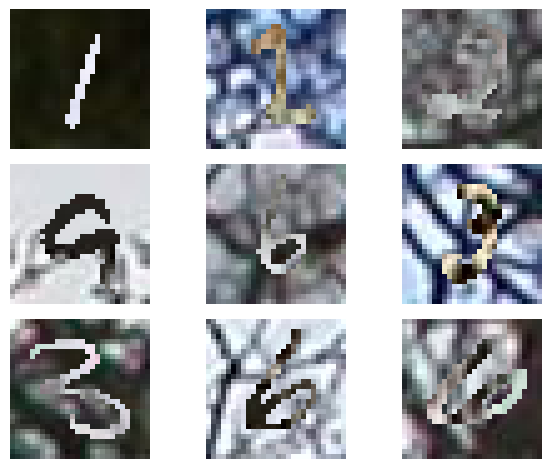

In [10]:
for i, img_name in enumerate(os.listdir(folder)[:9]):
    plt.subplot(330 + 1 + i)
    image = imread(os.path.join(folder, img_name))
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()

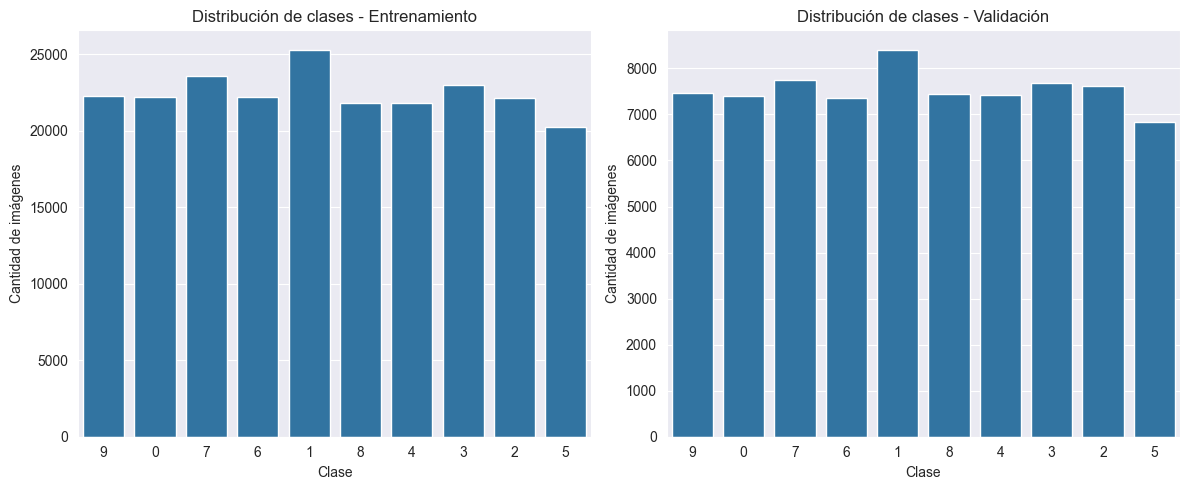

In [11]:
# Rutas
train_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/train"
val_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/val"

# Contar ejemplos por clase
def contar_clases(path):
    conteos = {}
    for clase in os.listdir(path):
        clase_path = os.path.join(path, clase)
        if os.path.isdir(clase_path):
            conteos[clase] = len(os.listdir(clase_path))
    return conteos

conteo_train = contar_clases(train_path)
conteo_val = contar_clases(val_path)

# Graficar
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=list(conteo_train.keys()), y=list(conteo_train.values()))
plt.title("Distribución de clases - Entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")

plt.subplot(1,2,2)
sns.barplot(x=list(conteo_val.keys()), y=list(conteo_val.values()))
plt.title("Distribución de clases - Validación")
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Tanto el conjunto de entrenamiento como el de validación están balanceados. Esto es positivo, ya que los modelos entrenados no estarán inclinados a favorecer una clase sobre otra simplemente por mayor frecuencia en los datos.

Además los datos cuentan con una dimensión de 64x64 pixeles y 3 canales de colores RGB.


## CNN Simple

In [12]:
modelo1 = keras.Sequential()
modelo1.add(keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo1.add(keras.layers.MaxPooling2D((2,2)))
modelo1.add(keras.layers.Flatten())
modelo1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo1.add(keras.layers.Dense(10, activation='softmax'))  # ← 10 clases ahora

# Compilar
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
modelo1.summary()

/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,196,618 (16.01 MB)

 Trainable params: 4,196,618 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo Simple

In [13]:
# Ruta base
folder = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"

# Normalización
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generador para entrenamiento
train_it = datagen.flow_from_directory(
    directory=os.path.join(folder, "train"),
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

# Generador para validación
val_it = datagen.flow_from_directory(
    directory=os.path.join(folder, "val"),
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

Found 224641 images belonging to 10 classes.
Found 75359 images belonging to 10 classes.


In [14]:
history = modelo1.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=5,
    verbose=True)
modelo1.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo1_polyMNIST.keras")

Epoch 1/5


/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3510/3510 ━━━━━━━━━━━━━━━━━━━━ 145s 41ms/step - accuracy: 0.8006 - loss: 0.6255 - val_accuracy: 0.9288 - val_loss: 0.2277
Epoch 2/5
   1/3510 ━━━━━━━━━━━━━━━━━━━━ 1:35 27ms/step - accuracy: 0.9531 - loss: 0.1681

/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3510/3510 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9531 - loss: 0.1681 - val_accuracy: 0.9284 - val_loss: 0.2296
Epoch 3/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 137s 39ms/step - accuracy: 0.9435 - loss: 0.1821 - val_accuracy: 0.9477 - val_loss: 0.1704
Epoch 4/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9531 - loss: 0.1462 - val_accuracy: 0.9477 - val_loss: 0.1699
Epoch 5/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 128s 37ms/step - accuracy: 0.9639 - loss: 0.1131 - val_accuracy: 0.9514 - val_loss: 0.1584


#### Validación  de resultados del Modelo Simple

In [15]:
# Evaluación
loss, acc = modelo1.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.2f%%' % (acc * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9506 - loss: 0.1582
> Precisión en validación: 95.14%


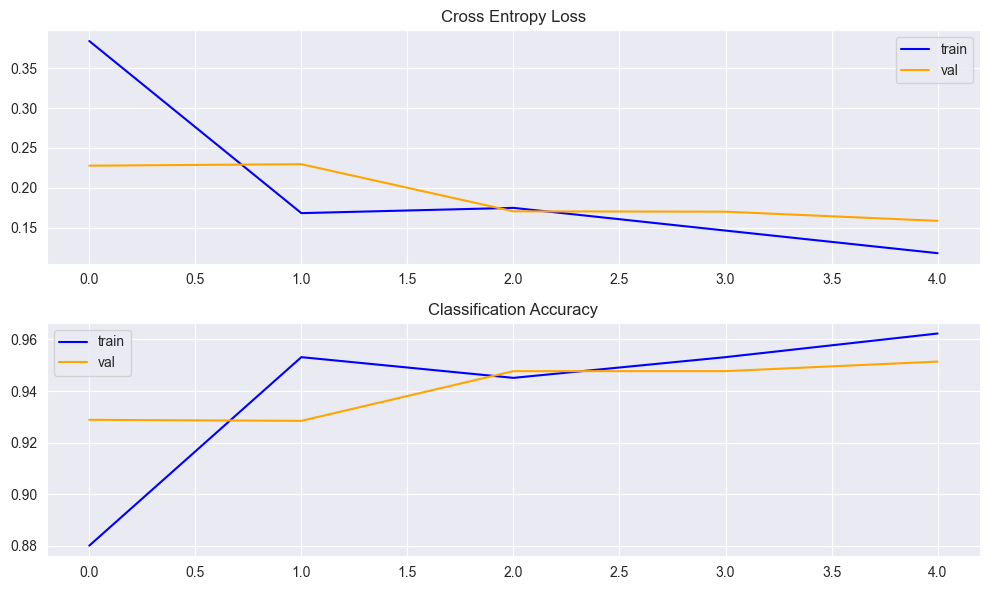

In [16]:
# Graficar pérdida y precisión
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

Como se puede observar, el modelo presenta un desempeño excelente. El accuracy alcanza aproximadamente un 95.45% tanto en el conjunto de entrenamiento como en el de validación. En las gráficas se muestran la pérdida y la exactitud para ambos conjuntos: entrenamiento (azul) y validación (naranja).

En el gráfico de la pérdida (loss), esta disminuye rápidamente durante las primeras épocas y se estabiliza en valores muy bajos, lo cual indica que el modelo está aprendiendo de manera efectiva sin señales claras de sobreajuste. Por otro lado, en la exactitud (accuracy), se observa un crecimiento constante durante las primeras épocas hasta alcanzar una meseta muy cercana al 100%.

Esto sugiere que el modelo ha logrado generalizar bien a los datos de validación y que entrenarlo por más épocas probablemente no genere mejoras significativas. El comportamiento de las curvas indica un buen balance entre el aprendizaje y la capacidad de generalización.

## CNN VGG

In [17]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo2.add(keras.layers.MaxPooling2D((2, 2)))

modelo2.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo2.add(keras.layers.MaxPooling2D((2, 2)))

modelo2.add(keras.layers.Flatten())
modelo2.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Salida: 10 clases (0–9)
modelo2.add(keras.layers.Dense(10, activation='softmax'))

# Compilar modelo
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

modelo2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo VGG

In [18]:
history2 = modelo2.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=5,
    verbose=True)
modelo2.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo2_polyMNIST.keras")

Epoch 1/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 211s 60ms/step - accuracy: 0.8633 - loss: 0.4314 - val_accuracy: 0.9713 - val_loss: 0.0922
Epoch 2/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9688 - loss: 0.1253 - val_accuracy: 0.9716 - val_loss: 0.0918
Epoch 3/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 216s 61ms/step - accuracy: 0.9795 - loss: 0.0653 - val_accuracy: 0.9782 - val_loss: 0.0671
Epoch 4/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9844 - loss: 0.0447 - val_accuracy: 0.9782 - val_loss: 0.0673
Epoch 5/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 208s 59ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 0.9823 - val_loss: 0.0551


#### Validación de resultados del modelo VGG

In [19]:
# Evaluación final en el conjunto de validación
loss2, acc2 = modelo2.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.2f%%' % (acc2 * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.9826 - loss: 0.0563
> Precisión en validación: 98.23%


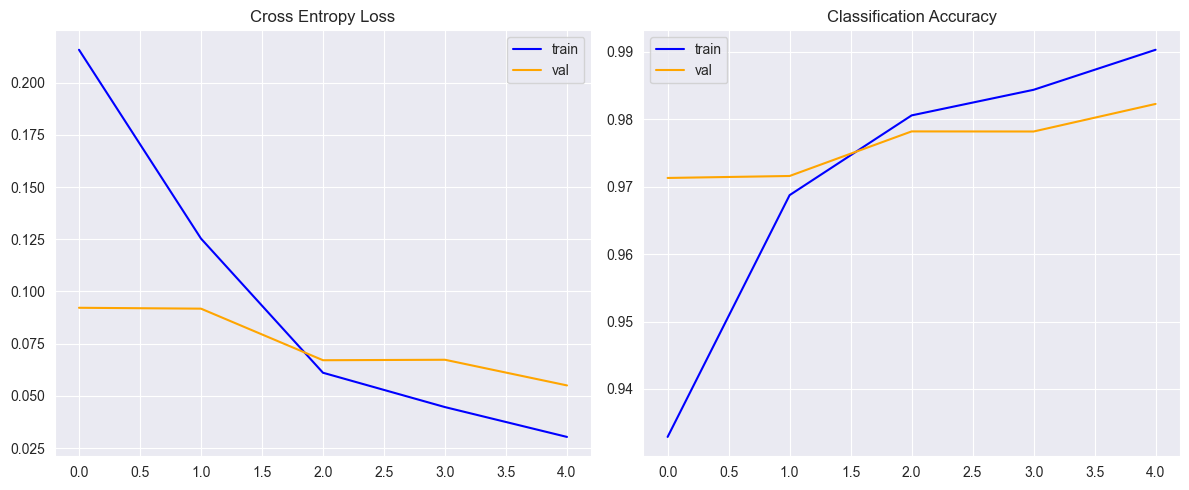

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='orange', label='val')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

Como se puede observar, el modelo presenta mejor desempeño, mejorando el modelo anterior. El accuracy alcanza aproximadamente un 98.16% tanto en el conjunto de entrenamiento como en el de validación. En las gráficas se muestran la pérdida y la exactitud para ambos conjuntos: entrenamiento (azul) y validación (naranja).

En el gráfico de la pérdida (loss), esta disminuye rápidamente durante las primeras épocas y se estabiliza en valores muy bajos, lo cual indica que el modelo está aprendiendo de manera efectiva sin señales claras de sobreajuste. Por otro lado, en la exactitud (accuracy), se observa un crecimiento constante durante las primeras épocas hasta alcanzar una meseta muy cercana al 100%.

Esto sugiere que el modelo ha logrado generalizar bien a los datos de validación y que entrenarlo por más épocas probablemente no genere mejoras significativas. El comportamiento de las curvas indica un buen balance entre el aprendizaje y la capacidad de generalización.

## CNN Dropout

In [21]:
modelo3 = keras.Sequential()
modelo3.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo3.add(keras.layers.MaxPooling2D((2, 2)))
modelo3.add(keras.layers.Dropout(0.1))  # Dropout para reducir overfitting

modelo3.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo3.add(keras.layers.MaxPooling2D((2, 2)))
modelo3.add(keras.layers.Dropout(0.1))

modelo3.add(keras.layers.Flatten())
modelo3.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Salida para 10 clases
modelo3.add(keras.layers.Dense(10, activation='softmax'))

# Compilar modelo
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

modelo3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo CNN

In [22]:
history3 = modelo3.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=10,
    verbose=True)

modelo3.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo3_dropout_polyMNIST.keras")

Epoch 1/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 205s 58ms/step - accuracy: 0.7042 - loss: 0.9331 - val_accuracy: 0.9282 - val_loss: 0.2479
Epoch 2/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9219 - loss: 0.2402 - val_accuracy: 0.9274 - val_loss: 0.2497
Epoch 3/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 218s 62ms/step - accuracy: 0.9290 - loss: 0.2381 - val_accuracy: 0.9462 - val_loss: 0.1840
Epoch 4/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9688 - loss: 0.0837 - val_accuracy: 0.9468 - val_loss: 0.1825
Epoch 5/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 2501s 713ms/step - accuracy: 0.9505 - loss: 0.1659 - val_accuracy: 0.9556 - val_loss: 0.1496
Epoch 6/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9688 - loss: 0.1125 - val_accuracy: 0.9554 - val_loss: 0.1496
Epoch 7/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 217s 62ms/step - accuracy: 0.9617 - loss: 0.1261 - val_accuracy: 0.9632 - val_loss: 0.1219
Epoch 8/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9844

#### Validación de resultados del Modelo CNN

In [23]:
# Evaluación
loss3, acc3 = modelo3.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.2f%%' % (acc3 * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9683 - loss: 0.1028
> Precisión en validación: 96.89%


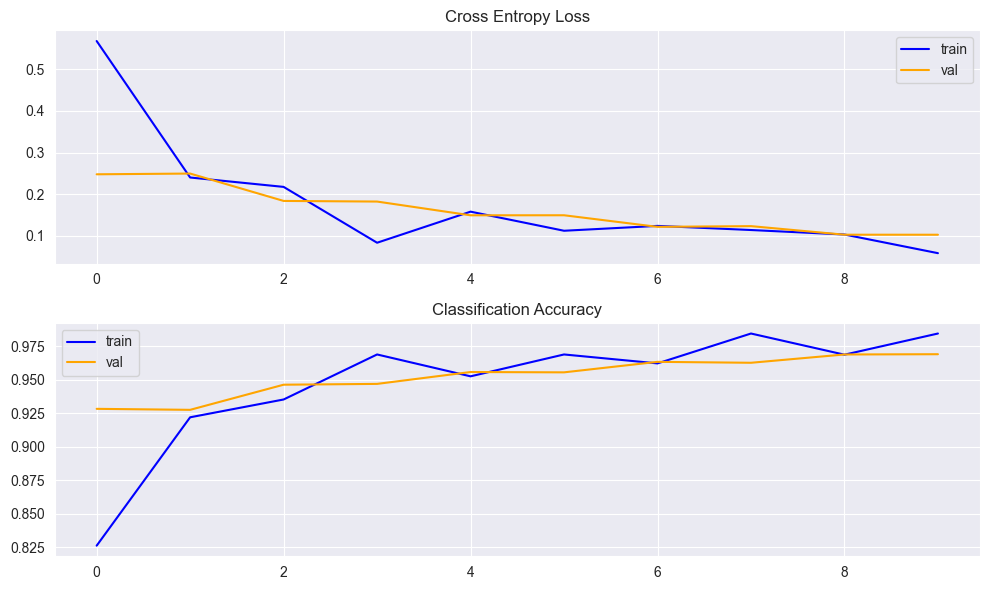

In [24]:
# Gráficas
plt.figure(figsize=(10, 6))

# Pérdida
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='train')
plt.plot(history3.history['val_loss'], color='orange', label='val')
plt.legend()

# Precisión
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

### CNN Augmented

In [25]:
# Augmentación para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Solo reescalado para validación
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Cargar imágenes desde carpetas (10 clases: 0 a 9)
train_it = train_datagen.flow_from_directory(
    folder + "train/",
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

val_it = test_datagen.flow_from_directory(
    folder + "val/",
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

Found 224641 images belonging to 10 classes.
Found 75359 images belonging to 10 classes.


In [26]:
modelo4 = keras.Sequential()
modelo4.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo4.add(keras.layers.MaxPooling2D((2, 2)))
# modelo4.add(keras.layers.Dropout(0.2))  # Puedes activarlo si ves overfitting

modelo4.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo4.add(keras.layers.MaxPooling2D((2, 2)))
# modelo4.add(keras.layers.Dropout(0.2))

modelo4.add(keras.layers.Flatten())
modelo4.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo4.add(keras.layers.Dense(10, activation='softmax'))  # ✅ 10 clases

# Compilación
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

modelo4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo Augmented

In [27]:
history4 = modelo4.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=3,  # Puedes subirlo a 10 si observas buen desempeño
    verbose=True)

modelo4.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo4_augmented_polyMNIST.keras")

Epoch 1/3
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 215s 61ms/step - accuracy: 0.4970 - loss: 1.4694 - val_accuracy: 0.8291 - val_loss: 0.5281
Epoch 2/3
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7812 - loss: 0.6372 - val_accuracy: 0.8282 - val_loss: 0.5318
Epoch 3/3
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 225s 64ms/step - accuracy: 0.7891 - loss: 0.6436 - val_accuracy: 0.8813 - val_loss: 0.3802


#### Validación de resultados del Modelo Augmented

In [28]:
# Evaluación
loss4, acc4 = modelo4.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.3f%%' % (acc4 * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.8814 - loss: 0.3794
> Precisión en validación: 88.135%


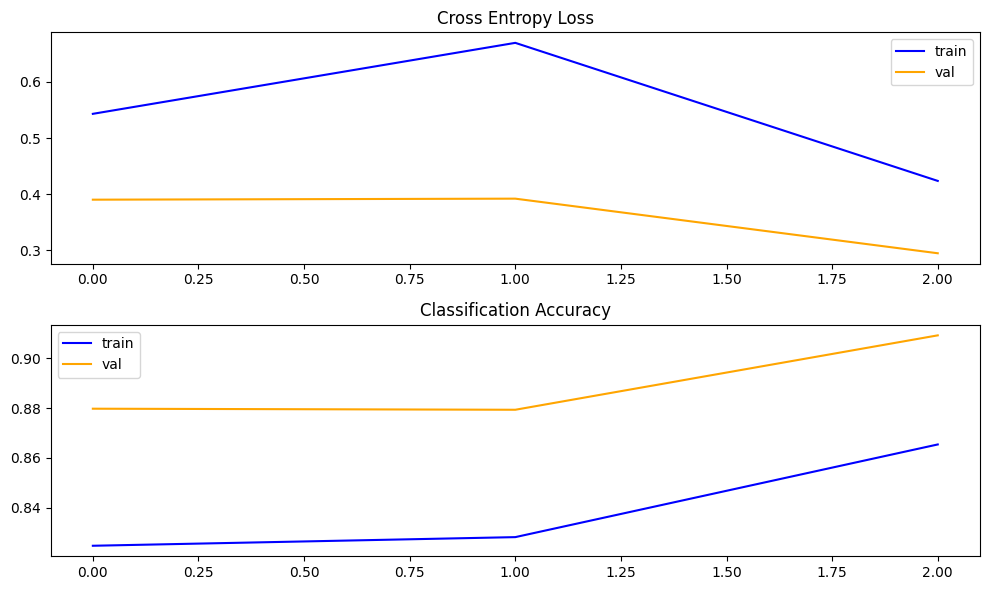

In [39]:
# Gráficas
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history4.history['loss'], color='blue', label='train')
plt.plot(history4.history['val_loss'], color='orange', label='val')
plt.legend()

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

## Modelo alternativo: Red neuronal densa (sin convoluciones)

In [29]:
# 3. Modelo alternativo: Red neuronal densa (sin convoluciones)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import time

# Preparar datos
X_train = fotos_train.reshape((fotos_train.shape[0], -1))
X_val = fotos_val.reshape((fotos_val.shape[0], -1))
y_train = to_categorical(etiquetas_train, num_classes=10)
y_val = to_categorical(etiquetas_val, num_classes=10)

modelo_dense = Sequential()
modelo_dense.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modelo_dense.add(Dense(128, activation='relu'))
modelo_dense.add(Dense(10, activation='softmax'))

modelo_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history_dense = modelo_dense.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=True)
time_dense = time.time() - start


/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - accuracy: 0.5227 - loss: 1.4976 - val_accuracy: 0.6914 - val_loss: 0.9713
Epoch 2/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.7328 - loss: 0.8231 - val_accuracy: 0.6430 - val_loss: 1.1200
Epoch 3/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7460 - loss: 0.7906 - val_accuracy: 0.7313 - val_loss: 0.8269
Epoch 4/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7792 - loss: 0.6839 - val_accuracy: 0.7655 - val_loss: 0.7331
Epoch 5/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7930 - loss: 0.6457 - val_accuracy: 0.7367 - val_loss: 0.8248


Una Red Densa (o red completamente conectada) fue seleccionada como modelo base alternativo a las CNNs con el objetivo de comparar su rendimiento en tareas de clasificación de imágenes. Aunque las redes densas no están específicamente diseñadas para datos visuales, representan una arquitectura estándar en muchos problemas de clasificación supervisada y permiten contrastar cómo diferentes tipos de redes manejan las mismas entradas.

Justificación de la elección
implicidad estructural: Las redes densas son más fáciles de implementar y requieren menos diseño arquitectónico.
Punto de comparación justo: Sirve como línea base para observar qué tanto valor agregan las CNNs cuando se trata de aprender patrones espaciales complejos en imágenes.
Útil para entender el impacto del preprocesamiento: Al no tener convoluciones, la red depende más del escalado y de que la información relevante esté explícitamente en los píxeles.


Efectividad en este contexto

Sin embargo, los resultados mostraron que su efectividad fue limitada:
	•	La red densa alcanzó solo un 73.67% de precisión en validación, comparado con más del 95% de las CNNs.
	•	Esto se debe a que las redes densas no capturan estructuras espaciales ni patrones locales de las imágenes (como bordes, formas o texturas), lo cual es esencial en tareas de visión por computadora.
	•	Además, tienen más parámetros al conectarse completamente entre capas, lo que puede llevar al sobreajuste o a un entrenamiento más inestable sin una gran cantidad de datos o regularización adecuada.

## Comparación de modelos

          Modelo   Accuracy
0     CNN Simple  95.140594
1        CNN VGG  98.228478
2    CNN Dropout  96.894866
3  CNN Augmented  88.135457
4      Red Densa  73.667377


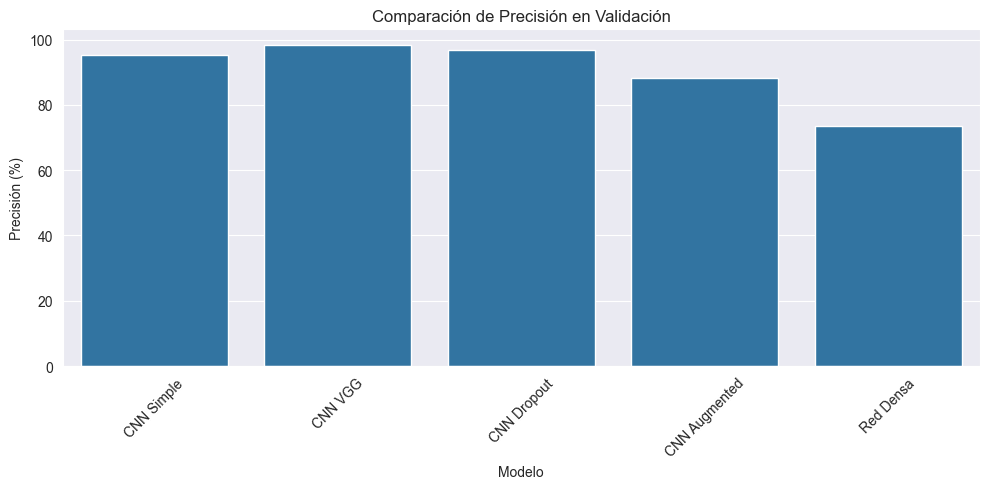

In [38]:
# 4. Comparación de modelos
resultados = {
    "Modelo": ["CNN Simple", "CNN VGG", "CNN Dropout", "CNN Augmented", "Red Densa"],
    "Accuracy": [acc*100, acc2*100, acc3*100, acc4*100, history_dense.history['val_accuracy'][-1]*100]
}

resultados_df = pd.DataFrame(resultados)
print(resultados_df)

# Gráfica comparativa
plt.figure(figsize=(10,5))
sns.barplot(data=resultados_df, x="Modelo", y="Accuracy")
plt.title("Comparación de Precisión en Validación")
plt.ylabel("Precisión (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De acuerdo con los resultados obtenidos, el modelo CNN VGG (modelo más profundo con múltiples capas convolucionales) fue el que alcanzó la mayor precisión en la tarea de clasificación de dígitos en el dataset PolyMNIST, logrando un 98.23% de accuracy en validación. Esto sugiere que una arquitectura más profunda y bien regularizada es altamente efectiva para este tipo de datos visuales.

El modelo CNN Dropout también mostró buen rendimiento (96.89%), indicando que introducir regularización con Dropout ayuda a reducir el sobreajuste sin sacrificar mucha precisión. El modelo CNN Simple, aunque más básico, logró una precisión del 95.14%, demostrando que incluso con una arquitectura sencilla, el modelo puede generalizar razonablemente bien.

En contraste, el modelo con Data Augmentation (CNN Augmented) tuvo un rendimiento menor (88.13%), lo que sugiere que, aunque el aumento de datos es útil para mejorar generalización, puede requerir más épocas o ajustes en la arquitectura para alcanzar el rendimiento óptimo.

Finalmente, la Red Densa (fully connected) obtuvo la menor precisión (73.67%), lo cual era esperado ya que este tipo de modelos no explotan la estructura espacial de las imágenes como lo hacen las CNNs.

## Predicción

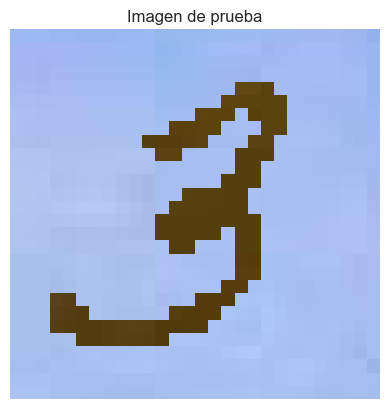

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicción: número 3
Vector de probabilidades: [[3.2842492e-12 1.5495064e-12 3.8627413e-12 1.0000000e+00 1.5695043e-15
  1.1951389e-08 5.3140484e-13 6.6791714e-16 2.9680258e-10 1.3634480e-11]]


In [40]:
# Ruta corregida a imagen de prueba
folder = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"
name = folder + "val/3/m0_4959.3.png"  # <-- imagen en la clase 3

# Mostrar imagen original
foto = imread(name)
plt.imshow(foto)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preparar imagen para el modelo
imagen = kerasImg.load_img(name, target_size=(64, 64))
imagen = kerasImg.img_to_array(imagen)
imagen = imagen.reshape(1, 64, 64, 3)
imagen = imagen.astype('float32') / 255.0  # Normalizar como en test_datagen

# Predecir con el modelo
pred = modelo2.predict(imagen)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

Usando el modelo CNN VGG (modelo más profundo con múltiples capas convolucionales) el cual fue el que alcanzó la mayor precisión, se logró predecir correctamente el número 3, el cúal fue el que se utilizó como prueba


## Pruebas con dígitos a mano

#### Carga de imágenes al modelo 2

In [49]:
from os import listdir
from os.path import join
from tensorflow.keras.models import load_model

# Carga tu modelo entrenado (ajusta la ruta si usas otro modelo)
modelo = load_model("/Users/danielmachic/Desktop/Data Science/CNN/modelo2_polyMNIST.keras")
nuevas_imgs_dir = "/Users/danielmachic/Desktop/Data Science/CNN/Nuevas/"

for archivo in listdir(nuevas_imgs_dir):
    if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
        ruta = join(nuevas_imgs_dir, archivo)
        img = kerasImg.load_img(ruta, target_size=(64, 64), color_mode='rgb')
        img_array = kerasImg.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        pred = modelo.predict(img_array)
        clase = np.argmax(pred)
        print(f"{archivo} → Predicción:número {clase}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8.JPG → Predicción:número 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9.JPG → Predicción:número 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4.JPG → Predicción:número 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5.JPG → Predicción:número 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7.JPG → Predicción:número 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6.JPG → Predicción:número 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2.JPG → Predicción:número 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3.JPG → Predicción:número 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1.JPG → Predicción:número 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0.JPG → Predicción:número 0


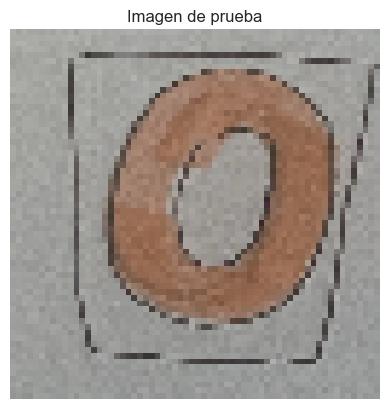

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicción: número 0
Vector de probabilidades: [[9.80401218e-01 4.23173333e-06 5.20688074e-04 2.27748431e-04
  1.21940539e-04 1.38121919e-04 4.07405896e-03 2.92665199e-08
  1.34140095e-02 1.09792966e-03]]


In [47]:
# Cargar el modelo ya entrenado
modelo = load_model("/Users/danielmachic/Desktop/Data Science/CNN/modelo2_polyMNIST.keras")

# Ruta de la imagen de prueba (ajústala si es necesario)
ruta_imagen = "/Users/danielmachic/Desktop/Data Science/CNN/Nuevas/0.JPG"

# Mostrar imagen original
img = kerasImg.load_img(ruta_imagen, target_size=(64, 64), color_mode='rgb')
plt.imshow(img)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preprocesar imagen
img_array = kerasImg.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predecir
pred = modelo.predict(img_array)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

Como podemos observar, al usar el VGG que es el modelo con múltiples capas convolucionales, se pudo predecir correctamente que es el número 0.

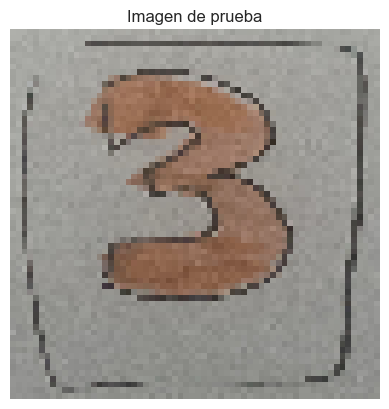

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción: número 3
Vector de probabilidades: [[3.4165066e-06 6.9115840e-06 6.0788400e-02 9.3678564e-01 1.1035862e-06
  1.5105391e-03 1.3286090e-05 3.0192547e-04 4.0033697e-06 5.8473542e-04]]


In [50]:
# Ruta de la imagen de prueba (ajústala si es necesario)
ruta_imagen = "/Users/danielmachic/Desktop/Data Science/CNN/Nuevas/3.JPG"

# Mostrar imagen original
img = kerasImg.load_img(ruta_imagen, target_size=(64, 64), color_mode='rgb')
plt.imshow(img)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preprocesar imagen
img_array = kerasImg.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predecir
pred = modelo.predict(img_array)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

Predicción correcta

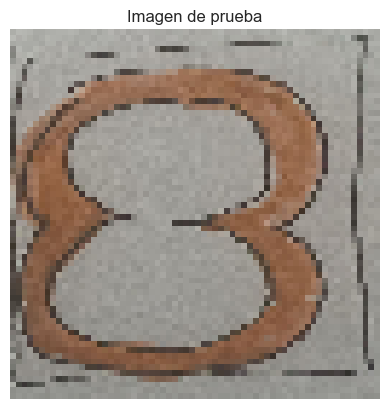

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicción: número 3
Vector de probabilidades: [[2.1666195e-04 8.3316176e-04 1.8452562e-01 7.7587456e-01 7.3988229e-04
  2.3127333e-04 9.6971814e-07 1.0901380e-04 3.6906689e-02 5.6225684e-04]]


In [51]:
# Ruta de la imagen de prueba (ajústala si es necesario)
ruta_imagen = "/Users/danielmachic/Desktop/Data Science/CNN/Nuevas/8.JPG"

# Mostrar imagen original
img = kerasImg.load_img(ruta_imagen, target_size=(64, 64), color_mode='rgb')
plt.imshow(img)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preprocesar imagen
img_array = kerasImg.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predecir
pred = modelo.predict(img_array)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

En este número el modelo no fue capáz de predecir correctamente el número ya que se puede confundir con el 3, el cuál fue el que predijo incialmente. Este número estraría en el 2% de error que tiene el modelo

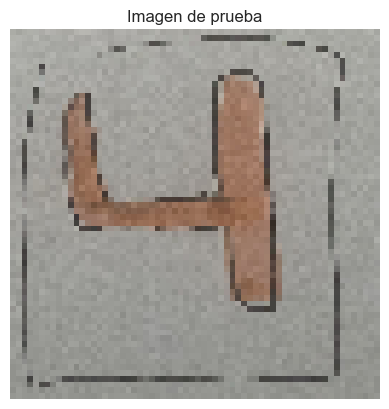

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción: número 4
Vector de probabilidades: [[1.78056311e-07 4.54705721e-03 8.34680759e-05 1.75970054e-04
  9.93930459e-01 1.89984872e-04 9.57107659e-07 4.12976897e-06
  1.47159435e-05 1.05293305e-03]]


In [52]:
# Ruta de la imagen de prueba (ajústala si es necesario)
ruta_imagen = "/Users/danielmachic/Desktop/Data Science/CNN/Nuevas/4.JPG"

# Mostrar imagen original
img = kerasImg.load_img(ruta_imagen, target_size=(64, 64), color_mode='rgb')
plt.imshow(img)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preprocesar imagen
img_array = kerasImg.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predecir
pred = modelo.predict(img_array)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

Predicción correcta

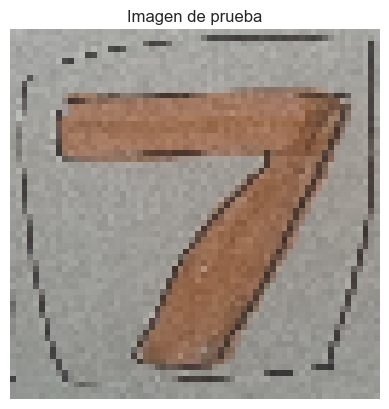

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción: número 7
Vector de probabilidades: [[3.5343561e-07 1.6191870e-02 8.6599305e-02 3.3151871e-03 9.5877886e-07
  5.6220665e-06 4.7220139e-09 8.9335740e-01 1.5873342e-05 5.1344268e-04]]


In [53]:
# Ruta de la imagen de prueba (ajústala si es necesario)
ruta_imagen = "/Users/danielmachic/Desktop/Data Science/CNN/Nuevas/7.JPG"

# Mostrar imagen original
img = kerasImg.load_img(ruta_imagen, target_size=(64, 64), color_mode='rgb')
plt.imshow(img)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preprocesar imagen
img_array = kerasImg.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predecir
pred = modelo.predict(img_array)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

Predicción correcta

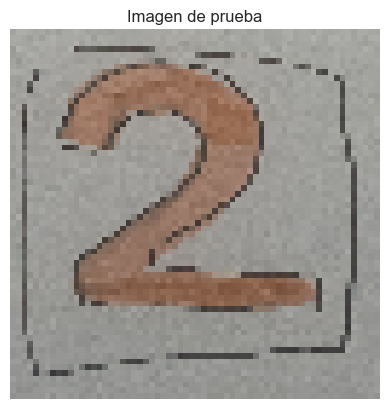

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción: número 2
Vector de probabilidades: [[8.1432518e-07 3.8881678e-04 9.5038539e-01 4.9135771e-02 4.5676501e-05
  1.9833209e-08 1.4992702e-07 4.3553402e-07 4.2826599e-05 1.9617882e-07]]


In [54]:
# Ruta de la imagen de prueba (ajústala si es necesario)
ruta_imagen = "/Users/danielmachic/Desktop/Data Science/CNN/Nuevas/2.JPG"

# Mostrar imagen original
img = kerasImg.load_img(ruta_imagen, target_size=(64, 64), color_mode='rgb')
plt.imshow(img)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preprocesar imagen
img_array = kerasImg.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predecir
pred = modelo.predict(img_array)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

Predicción correcta

## Link de Github

https://github.com/mac2218/Laboratorio3
